# PART 1

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
L1_P1 = pd.read_csv('heart-train.csv')

In [13]:
L1_P1.head()

sbp  tobacco   ldl  adiposity  famhist  typea  obesity  alcohol  age  chd
0  134    13.60  3.50      27.78  Present     60    25.99    57.34   49    1
1  132     6.20  6.47      36.21  Present     62    30.77    14.14   45    0
2  142     4.05  3.38      16.20   Absent     59    20.81     2.62   38    0
3  114     4.08  4.59      14.60  Present     62    23.11     6.72   58    1
4  114     0.00  3.83      19.40  Present     49    24.86     2.49   29    0

In [14]:
col_type = L1_P1.dtypes
col_type

sbp            int64
tobacco      float64
ldl          float64
adiposity    float64
famhist       object
typea          int64
obesity      float64
alcohol      float64
age            int64
chd            int64
dtype: object

In [16]:
nominal_columns = []
categorical_columns = []
continuous_columns = []
categorical_threshold = 10 #As there are 10 values only
for column_name, dtype in col_type.items():
    if dtype == 'object':
        nominal_columns.append(column_name)
    elif dtype == 'int64' or dtype == 'float64':
        unique_values = len(L1_P1[column_name].unique())
        if unique_values <= categorical_threshold:
            categorical_columns.append(column_name)
        else:
            continuous_columns.append(column_name)

In [17]:
print("Nominal Columns:", nominal_columns)
print("Categorical Columns:", categorical_columns)
print("Continuous Columns:", continuous_columns)

Nominal Columns: ['famhist']
Categorical Columns: ['chd']
Continuous Columns: ['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age']


In [19]:
L1_P1.describe()

sbp     tobacco         ldl   adiposity       typea     obesity  \
count  412.000000  412.000000  412.000000  412.000000  412.000000  412.000000   
mean   139.240291    3.666262    4.589539   25.151214   52.135922   25.802112   
std     20.451903    4.518501    1.883744    7.740794    9.592727    4.081745   
min    101.000000    0.000000    0.980000    6.740000   20.000000   17.890000   
25%    125.500000    0.037500    3.240000   19.397500   46.000000   22.737500   
50%    136.000000    1.805000    4.225000   26.090000   52.000000   25.635000   
75%    148.000000    5.850000    5.527500   30.755000   58.000000   28.167500   
max    218.000000   27.400000   14.160000   42.490000   73.000000   45.720000   

          alcohol         age         chd  
count  412.000000  412.000000  412.000000  
mean    18.030073   42.686893    0.332524  
std     25.298909   15.129338    0.471690  
min      0.000000   15.000000    0.000000  
25%      0.447500   30.750000    0.000000  
50%      7.510000   45.000000    0.000000  
75%     24.960000   57.000000    1.000000  
max    145.290000   64.000000    1.000000

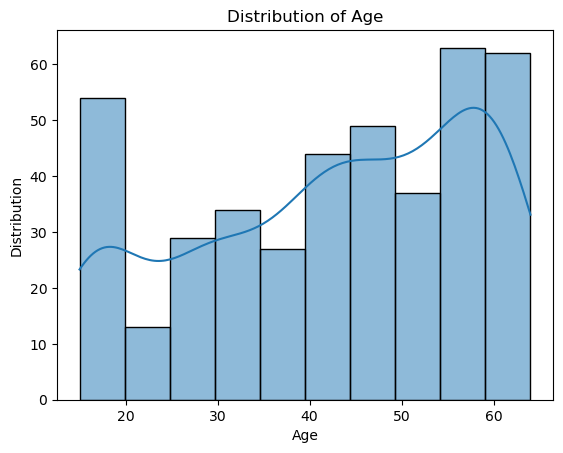

In [20]:
sns.histplot(L1_P1['age'], kde=True)
plt.xlabel('Age')
plt.ylabel('Distribution')
plt.title('Distribution of Age')
plt.show()

/var/folders/3k/3lbygck964ldccpncrf48vsw0000gn/T/ipykernel_26363/643132937.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = L1_P1.corr()


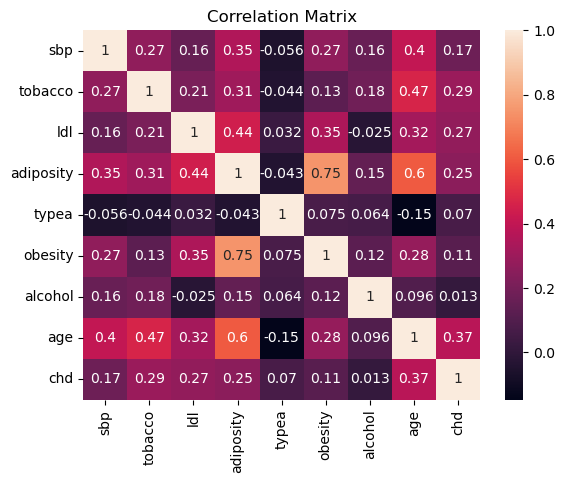

In [21]:
correlation_matrix = L1_P1.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

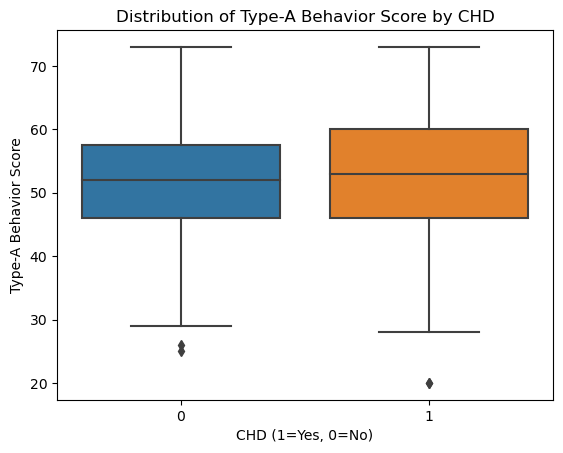

In [22]:
sns.boxplot(x='chd', y='typea', data=L1_P1)
plt.xlabel('CHD (1=Yes, 0=No)')
plt.ylabel('Type-A Behavior Score')
plt.title('Distribution of Type-A Behavior Score by CHD')
plt.show()

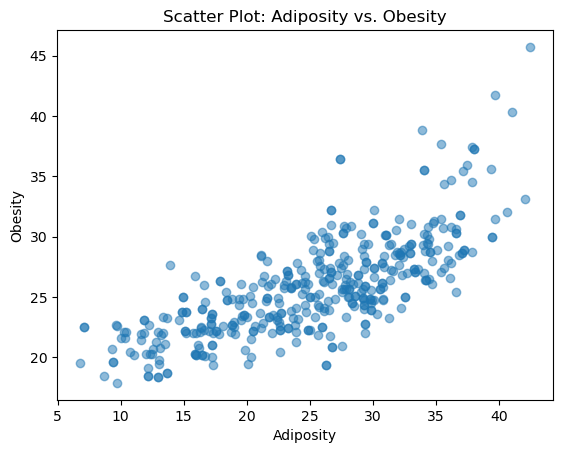

In [23]:
plt.scatter(L1_P1['adiposity'], L1_P1['obesity'], alpha=0.5)
plt.xlabel('Adiposity')
plt.ylabel('Obesity')
plt.title('Scatter Plot: Adiposity vs. Obesity')
plt.show()

In [24]:
correlation_age_chd = L1_P1['age'].corr(L1_P1['chd'])
correlation_sbp_chd = L1_P1['sbp'].corr(L1_P1['chd'])
correlation_alcohol_chd = L1_P1['alcohol'].corr(L1_P1['chd'])
correlation_tba_chd = L1_P1['tobacco'].corr(L1_P1['chd'])
correlation_typea_chd = L1_P1['typea'].corr(L1_P1['chd'])

print("Correlation between Age and CHD:", correlation_age_chd)
print("Correlation between Systolic Blood Pressure and CHD:", correlation_sbp_chd)
print("Correlation between Alcohal Pressure and CHD:", correlation_alcohol_chd)
print("Correlation between Tobacco Pressure and CHD:", correlation_tba_chd)
print("Correlation between Typea Pressure and CHD:", correlation_typea_chd)

Correlation between Age and CHD: 0.3736374032927482
Correlation between Systolic Blood Pressure and CHD: 0.17228163421702639
Correlation between Alcohal Pressure and CHD: 0.013458887544412827
Correlation between Tobacco Pressure and CHD: 0.29277218645205527
Correlation between Typea Pressure and CHD: 0.07010765400304282


In [25]:
tobacco_chd = L1_P1.groupby('chd')['tobacco'].mean()
print("Average Tobacco Consumption for CHD vs. No CHD:\n", tobacco_chd)

Average Tobacco Consumption for CHD vs. No CHD:
 chd
0    2.733673
1    5.538248
Name: tobacco, dtype: float64


In [27]:
L1_P1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        412 non-null    int64  
 1   tobacco    412 non-null    float64
 2   ldl        412 non-null    float64
 3   adiposity  412 non-null    float64
 4   famhist    412 non-null    object 
 5   typea      412 non-null    int64  
 6   obesity    412 non-null    float64
 7   alcohol    412 non-null    float64
 8   age        412 non-null    int64  
 9   chd        412 non-null    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 32.3+ KB


In [28]:
L1_P1.isnull().sum()

sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

In [29]:
# a. Find the oldest person
oldest_person_age = L1_P1['age'].max()
print(f"The oldest person is {oldest_person_age} years old.")

The oldest person is 64 years old.


In [30]:
# b. Find the youngest person
youngest_person_age = L1_P1['age'].min()
print(f"The youngest person is {youngest_person_age} years old.")

The youngest person is 15 years old.


In [31]:
# c. Find the average age group
average_age = L1_P1['age'].mean()
print(f"The average age in the dataset is {average_age:.3f} years.")

The average age in the dataset is 42.687 years.


In [32]:
# d. Find the median age
median_age = L1_P1['age'].median()
print(f"The median age in the dataset is {median_age} years.")

The median age in the dataset is 45.0 years.


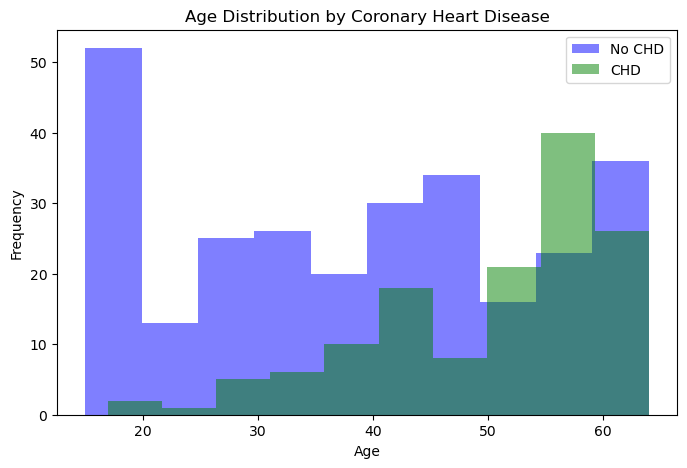

In [33]:
# e. Find the relationship between deaths and ages
# Visualizing the age distribution for patients with and without coronary heart disease
plt.figure(figsize=(8, 5))
L1_P1[L1_P1["chd"] == 0]["age"].plot(kind="hist", alpha=0.5, color="blue", label="No CHD")
L1_P1[L1_P1["chd"] == 1]["age"].plot(kind="hist", alpha=0.5, color="green", label="CHD")
plt.xlabel("Age")
plt.legend()
plt.title("Age Distribution by Coronary Heart Disease")
plt.show()

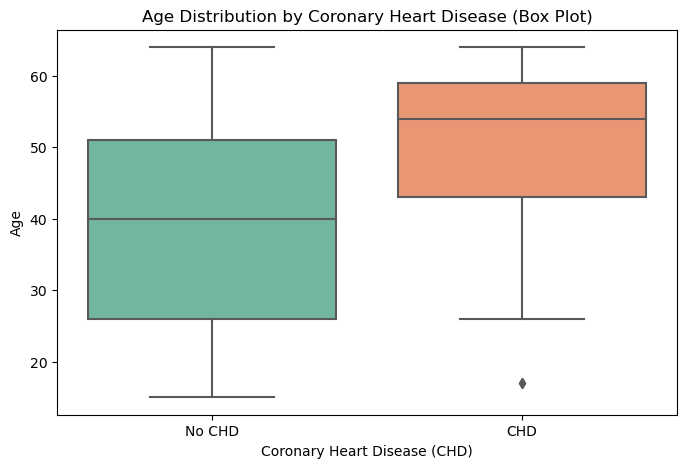

In [34]:
# Box plot 
plt.figure(figsize=(8, 5))
sns.boxplot(x="chd", y="age", data=L1_P1, palette="Set2")
plt.xlabel("Coronary Heart Disease (CHD)")
plt.ylabel("Age")
plt.xticks([0, 1], ["No CHD", "CHD"])
plt.title("Age Distribution by Coronary Heart Disease (Box Plot)")
plt.show()

In [35]:
# f. Find the age groups whose survival rate is the largest
L1_P1['age_group'] = pd.cut(L1_P1['age'], bins=[9, 19, 29, 39, 49, 59, 69, 79, 89], labels=['10-19','20-29','30-39', '40-49', '50-59', '60-69', '70-79', '80-89'])
survival_rates = L1_P1.groupby('age_group')['chd'].mean()
print("Survival Rates by Age Group:")
print(survival_rates)
# Age group with the largest survival rate
largest_survival = survival_rates.idxmin()
print("Age Group with Largest Survival Rate:", largest_survival)

Survival Rates by Age Group:
age_group
10-19    0.037037
20-29    0.095238
30-39    0.245902
40-49    0.311828
50-59    0.610000
60-69    0.419355
70-79         NaN
80-89         NaN
Name: chd, dtype: float64
Age Group with Largest Survival Rate: 10-19


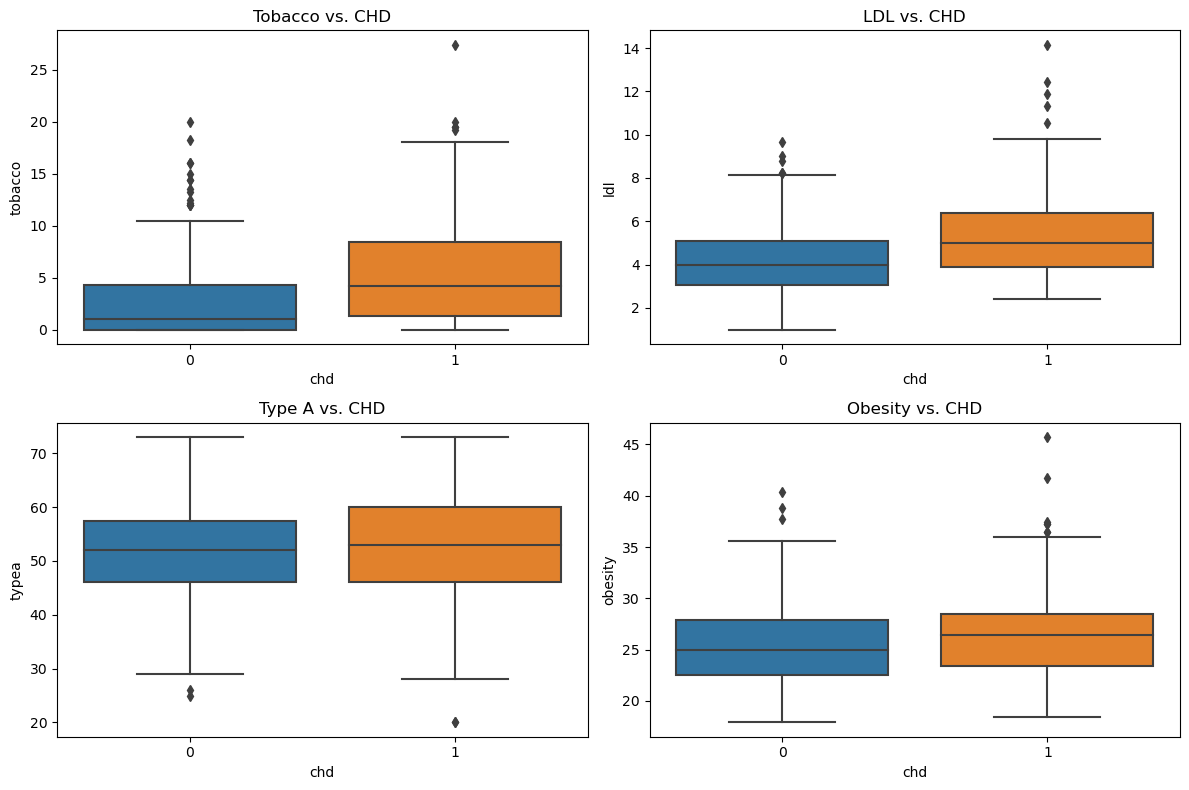

In [36]:
# g. Find similar relationships for at least 3-4 columns
# Visualizing the relationships between 'tobacco', 'ldl', 'typea', and 'obesity' with 'chd'
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.boxplot(x='chd', y='tobacco', data=L1_P1)
plt.title("Tobacco vs. CHD")

plt.subplot(2, 2, 2)
sns.boxplot(x='chd', y='ldl', data=L1_P1)
plt.title("LDL vs. CHD")

plt.subplot(2, 2, 3)
sns.boxplot(x='chd', y='typea', data=L1_P1)
plt.title("Type A vs. CHD")

plt.subplot(2, 2, 4)
sns.boxplot(x='chd', y='obesity', data=L1_P1)
plt.title("Obesity vs. CHD")

plt.tight_layout()
plt.show()

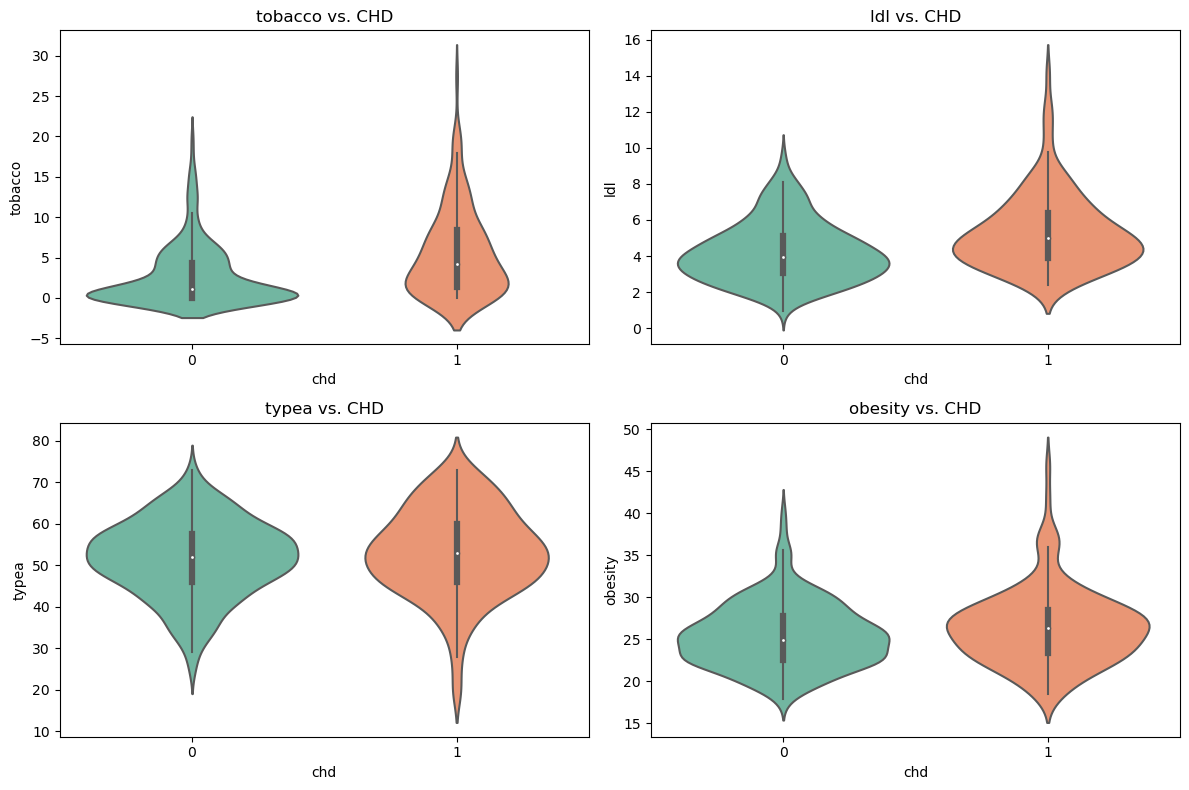

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# g. Find relationships for 'tobacco', 'ldl', 'typea', and 'obesity' with 'chd' using violin plots
variables = ['tobacco', 'ldl', 'typea', 'obesity']

plt.figure(figsize=(12, 8))
for i, variable in enumerate(variables, 1):
    plt.subplot(2, 2, i)
    sns.violinplot(x='chd', y=variable, data=L1_P1, palette="Set2")
    plt.title(f"{variable} vs. CHD")

plt.tight_layout()
plt.show()

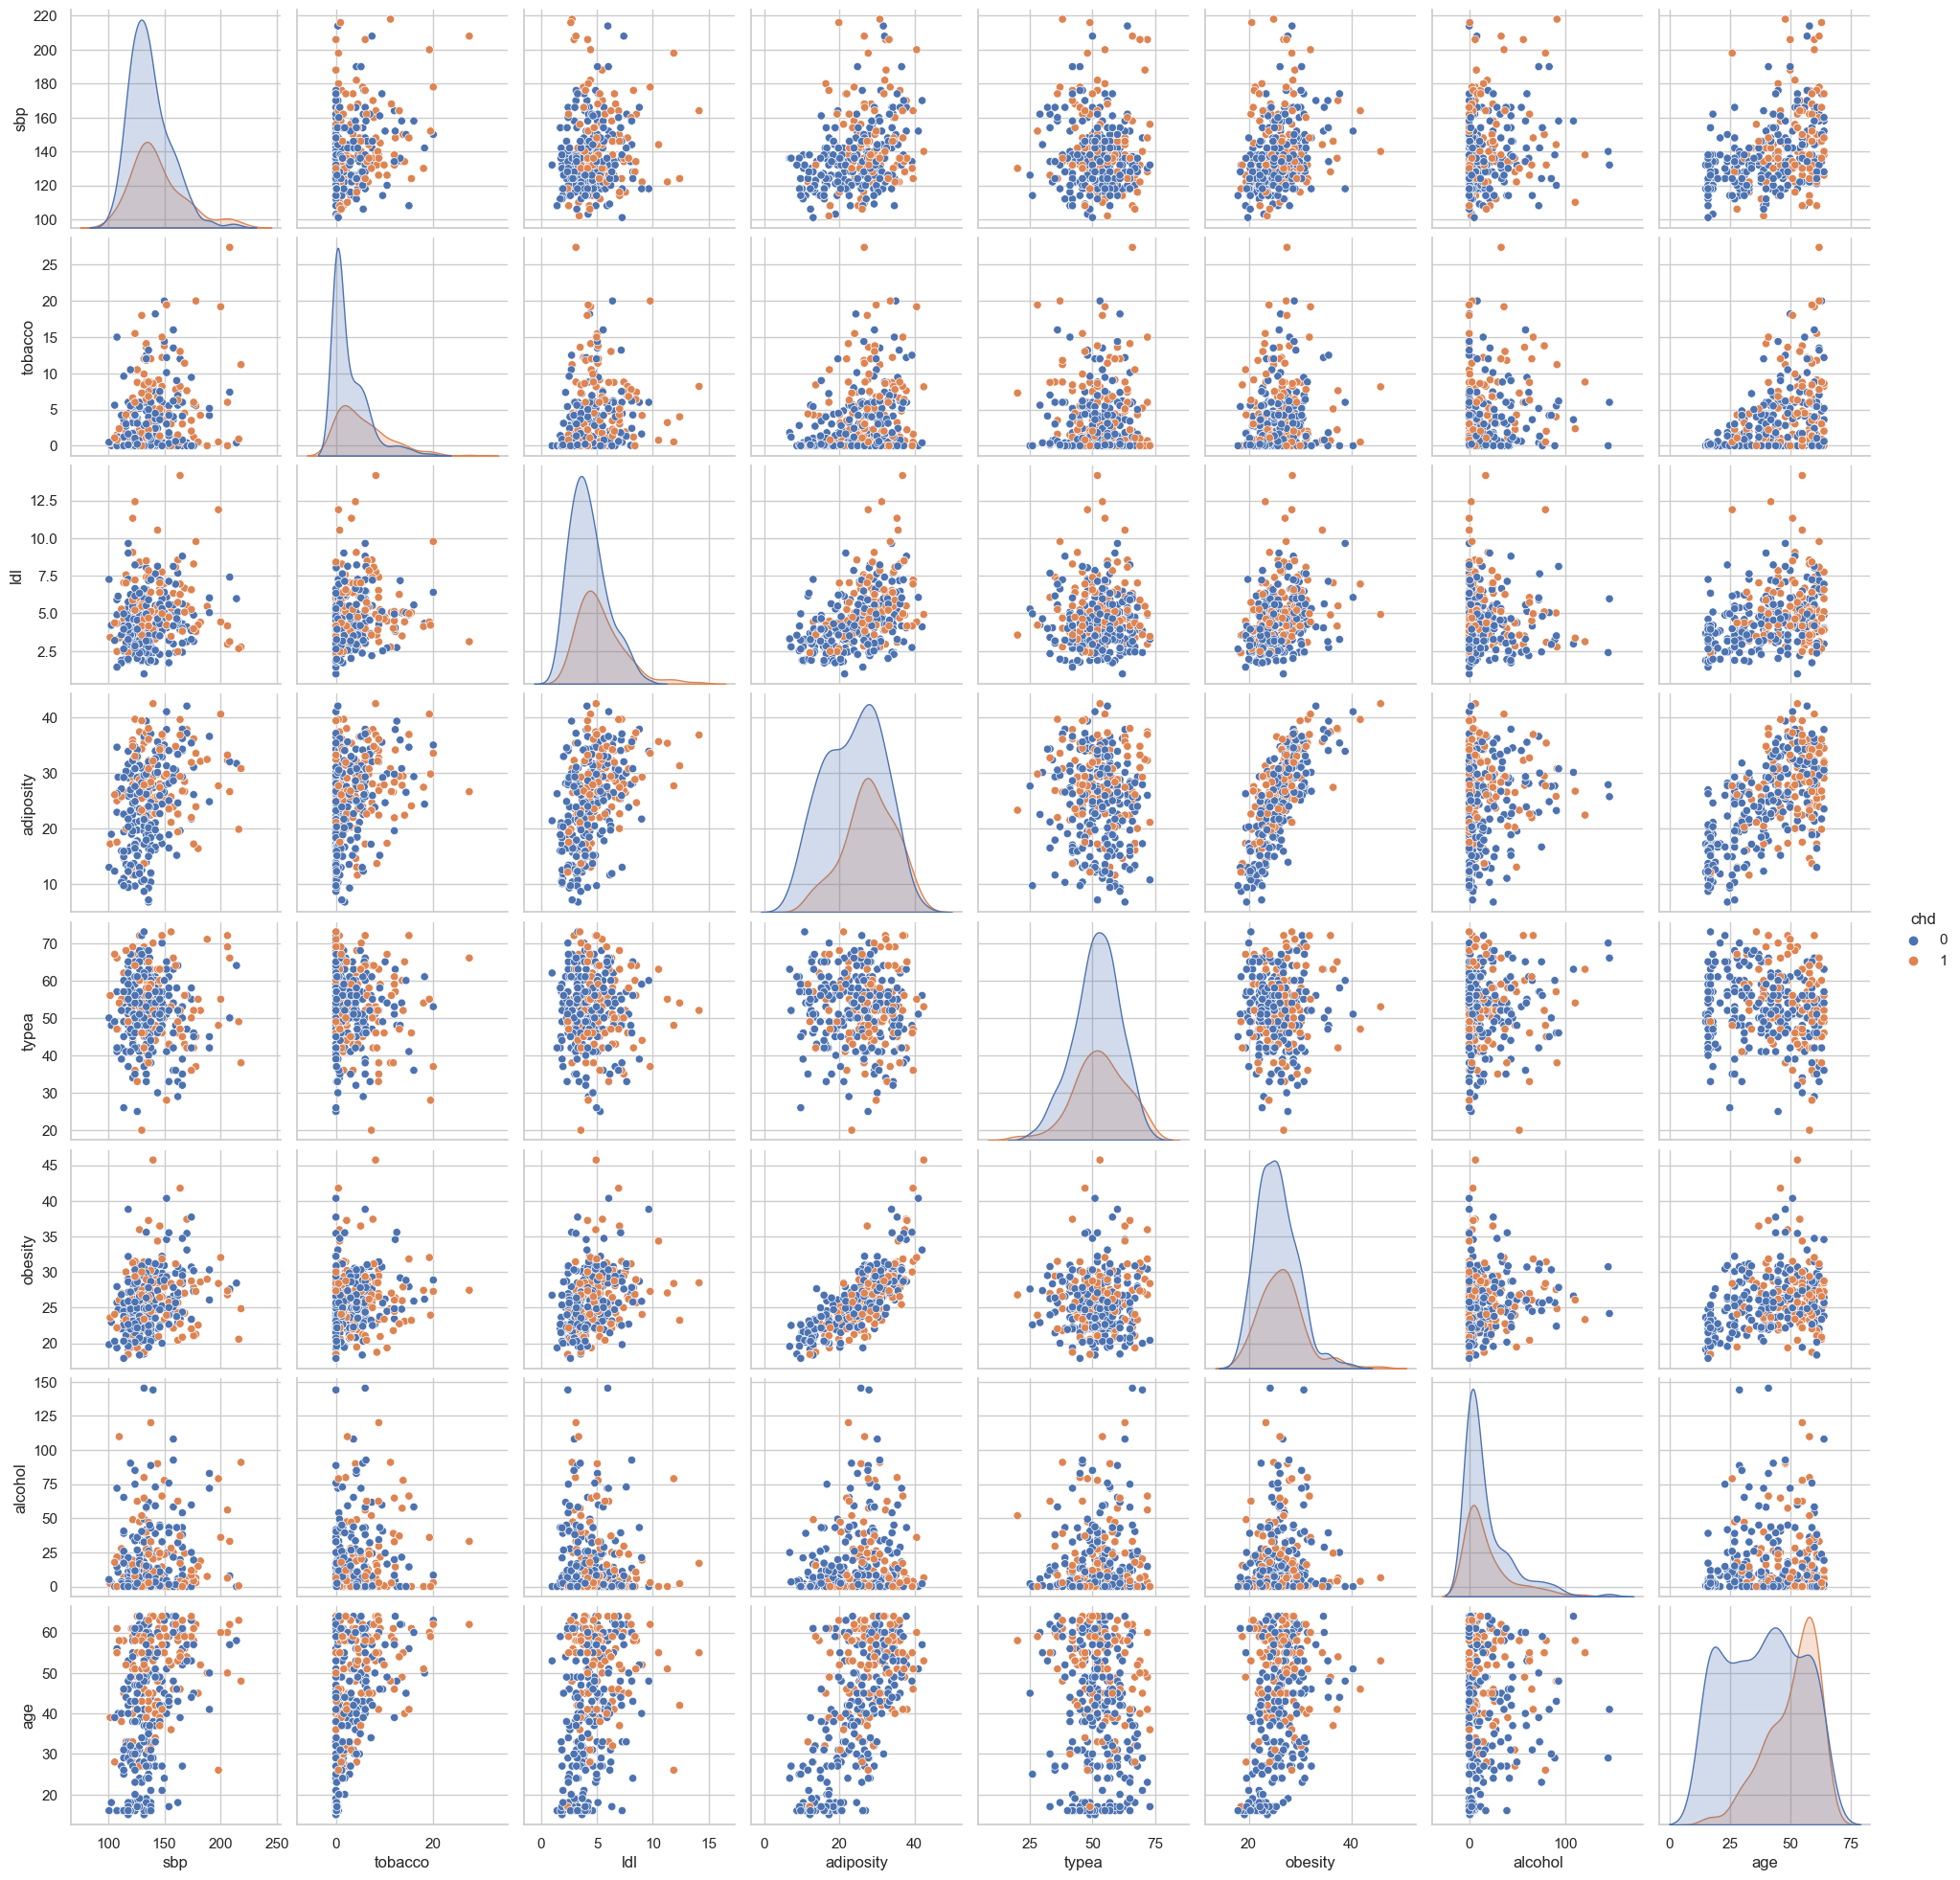

In [38]:
# h. Get more visuals on data distributions
# ii. Use plotCorrelationMatrix
sns.set(style="whitegrid")
sns.pairplot(L1_P1, hue="chd", vars=["sbp", "tobacco", "ldl", "adiposity", "typea", "obesity", "alcohol", "age"])
plt.show()

/var/folders/3k/3lbygck964ldccpncrf48vsw0000gn/T/ipykernel_26363/1926108788.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = L1_P1.corr()


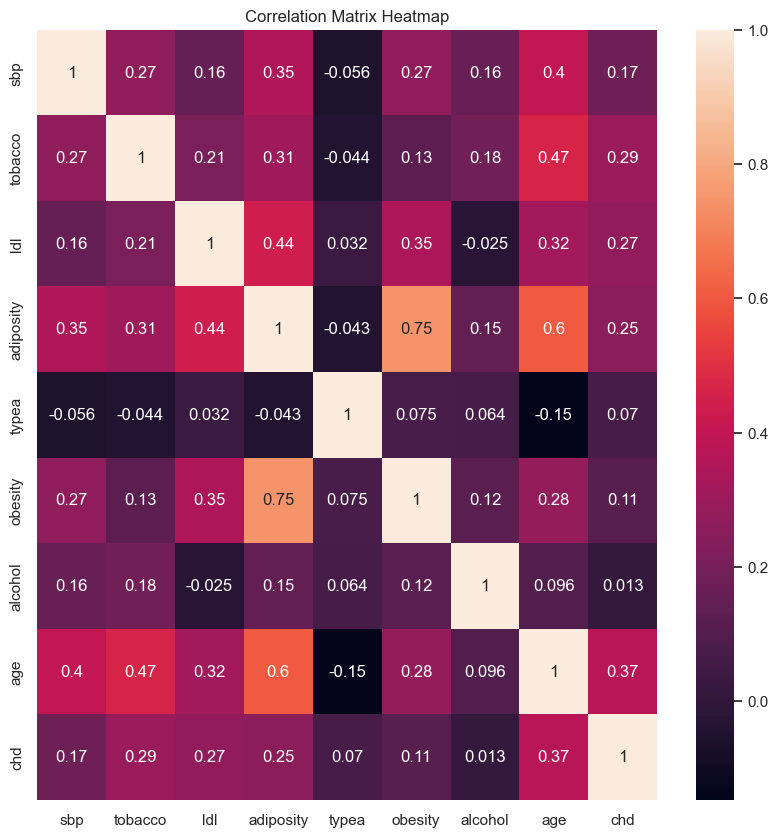

In [39]:
# i. Use plotCorrelationMatrix
correlation_matrix = L1_P1.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

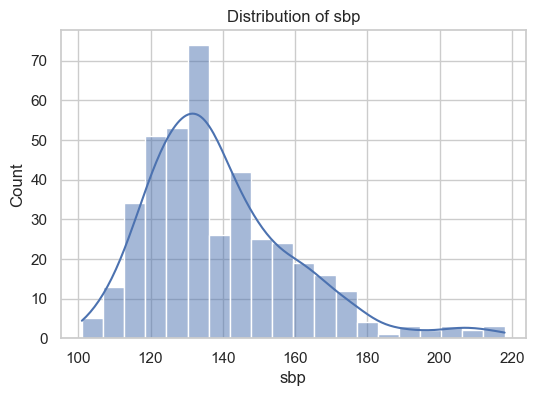

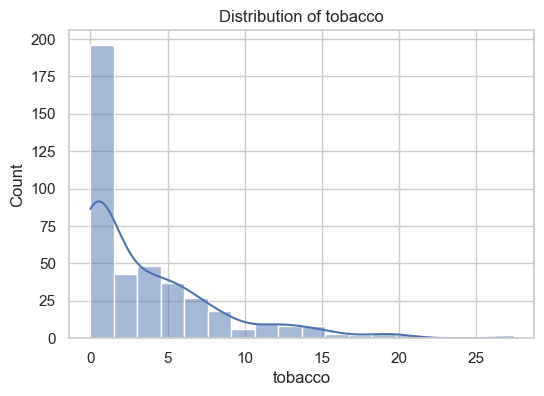

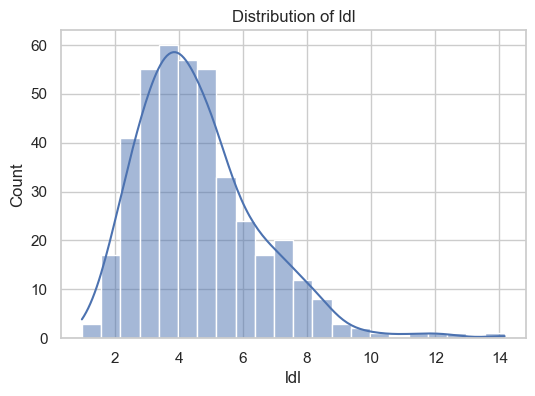

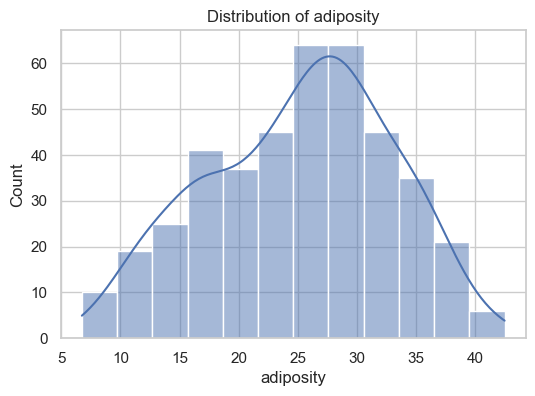

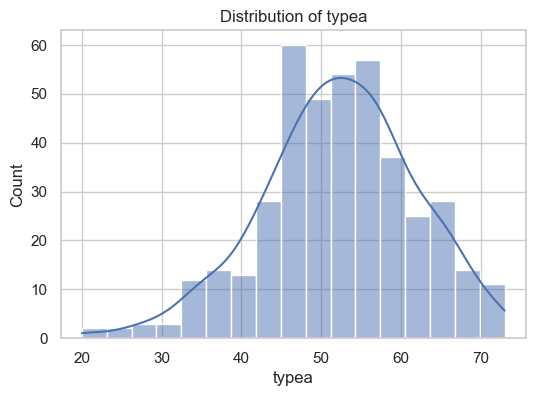

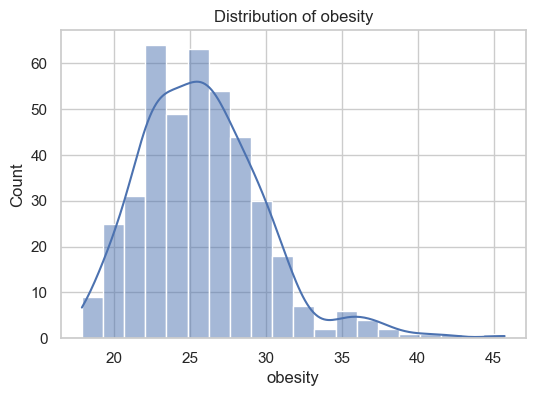

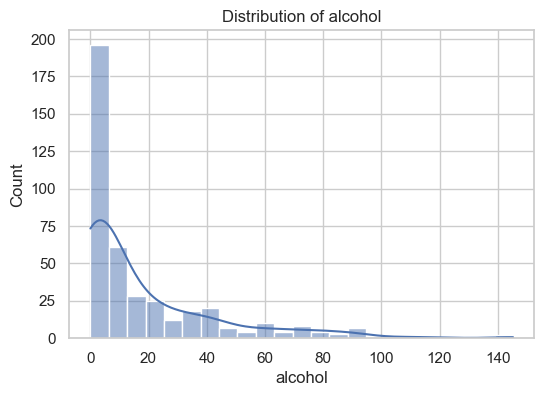

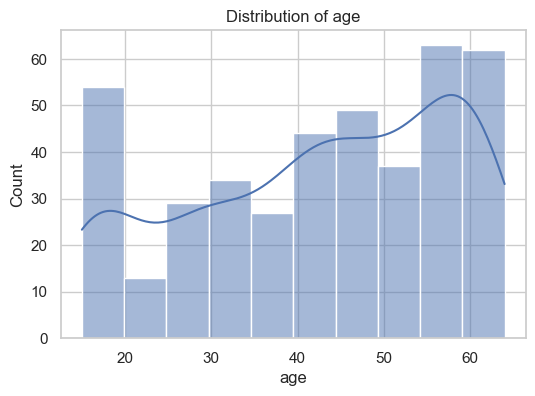

In [40]:
# iii. Use plotPerColumnDistribution
for column in continuous_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=L1_P1, x=column, kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()

In [41]:
# Check for missing values
# i. Find missing values
missing_values = L1_P1.isnull()
missing_values

sbp  tobacco    ldl  adiposity  famhist  typea  obesity  alcohol  \
0    False    False  False      False    False  False    False    False   
1    False    False  False      False    False  False    False    False   
2    False    False  False      False    False  False    False    False   
3    False    False  False      False    False  False    False    False   
4    False    False  False      False    False  False    False    False   
..     ...      ...    ...        ...      ...    ...      ...      ...   
407  False    False  False      False    False  False    False    False   
408  False    False  False      False    False  False    False    False   
409  False    False  False      False    False  False    False    False   
410  False    False  False      False    False  False    False    False   
411  False    False  False      False    False  False    False    False   

       age    chd  age_group  
0    False  False      False  
1    False  False      False  
2    False  False      False  
3    False  False      False  
4    False  False      False  
..     ...    ...        ...  
407  False  False      False  
408  False  False      False  
409  False  False      False  
410  False  False      False  
411  False  False      False  

[412 rows x 11 columns]

In [42]:
# ii. Get the count of missing values
missing_counts = missing_values.sum()
missing_counts

sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
age_group    0
dtype: int64

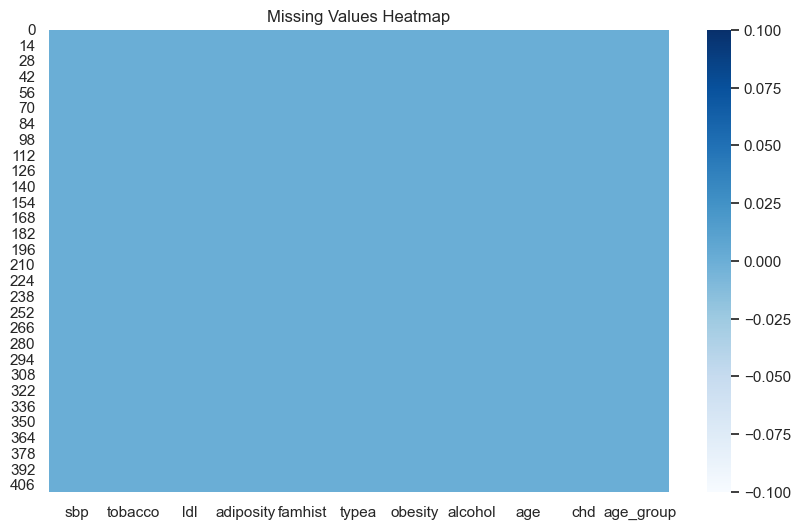

In [43]:
# Plot a heatmap for missing values
plt.figure(figsize=(10, 6))
sns.heatmap(missing_values, cbar=True, cmap='Blues')
plt.title("Missing Values Heatmap")
plt.show()

In [45]:
# j. Check for missing values and additional techniques to handle null values
for column in L1_P1.columns:
    if L1_P1[column].isnull().sum() > 0:
        if L1_P1[column].dtype == 'int' or L1_P1[column].dtype == 'float':
            median_value = L1_P1[column].median()
            L1_P1[column].fillna(median_value, inplace=True)

In [46]:
# k. Applying feature scaling (Optional)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
L1_P1[["sbp", "tobacco", "ldl", "adiposity", "typea", "obesity", "alcohol", "age"]] = scaler.fit_transform(L1_P1[["sbp", "tobacco", "ldl", "adiposity", "typea", "obesity", "alcohol", "age"]])

In [47]:
L1P1 = L1_P1.drop("age_group", axis = 1)

In [48]:
L1P1

sbp   tobacco       ldl  adiposity  famhist     typea   obesity  \
0   -0.256537  2.201131 -0.579093   0.340015  Present  0.820793  0.046087   
1   -0.354446  0.561429  0.999471   1.430374  Present  1.029537  1.218579   
2    0.135101  0.085029 -0.642874  -1.157775   Absent  0.716420 -1.224521   
3   -1.235630  0.091677  0.000245  -1.364723  Present  1.029537 -0.660351   
4   -1.235630 -0.812375 -0.403697  -0.743878  Present -0.327304 -0.231092   
..        ...       ...       ...        ...      ...       ...       ...   
407  0.330919 -0.014682 -0.573778  -0.320927   Absent -0.118559 -0.861490   
408  3.268198 -0.812375 -0.222986   1.044933   Absent  1.760144  0.382136   
409 -0.256537 -0.147631 -0.754489  -0.936599   Absent -1.788517  0.139298   
410  0.428829  2.511345  0.207531   1.524794  Present  2.073261  1.478588   
411 -0.648174 -0.765843 -0.339917  -1.298759   Absent  0.925165 -0.890925   

      alcohol       age  chd  
0    1.555708  0.417783    1  
1   -0.153951  0.153075    0  
2   -0.609861 -0.310165    0  
3   -0.447601  1.013377    1  
4   -0.615005 -0.905759    0  
..        ...       ...  ...  
407  1.016295 -0.045457    0  
408 -0.469368  0.483960    1  
409 -0.115167 -1.038113    0  
410  1.909117 -0.111634    1  
411 -0.617776 -1.699884    0  

[412 rows x 10 columns]

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Label encoding for the 'famhist' column
label_encoder = LabelEncoder()
L1P1['famhist'] = label_encoder.fit_transform(L1P1['famhist'])

# Separate the features (X) and the target variable (Y)
X = L1P1.drop(columns=["chd"])
Y = L1P1["chd"]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

# Create and train the Logistic Regression model
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, Y_train)

# Evaluate the model
train_score = logistic_regression.score(X_train, Y_train)
test_score = logistic_regression.score(X_test, Y_test)
print("Train Score:", train_score)
print("Test Score:", test_score)

Train Score: 0.7692307692307693
Test Score: 0.7454545454545455


In [50]:
# Calculate Mean Squared Error
mean_squared_error = mean_squared_error(logistic_regression.predict(X_test), Y_test, squared=True)
print("MSE:", mean_squared_error)

MSE: 0.2545454545454545


In [51]:
X_test = pd.read_csv('heart-test.csv')

In [52]:
# If you want to predict with the trained model, use X_test or a separate test dataset
pred_lreg = logistic_regression.predict(X_test)
pred_lreg

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0])

In [53]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
accuracy = accuracy_score(Y_test, pred_lreg)
f1 = f1_score(Y_test, pred_lreg)
precision = precision_score(Y_test, pred_lreg)
recall = recall_score(Y_test, pred_lreg)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.7454545454545455
F1 Score: 0.5434782608695652
Precision: 0.8064516129032258
Recall: 0.4098360655737705


# PART 2


In [54]:
import pandas as pd
Price_dataset = pd.read_csv('Price.csv')
Price_dataset.head()

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0         3       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0         5       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0         3       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0         3       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0         4       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    street       city  statezip country  
0          2005      18810 Densmore Ave N  Shoreline  WA 98133     USA  
1             0           709 W Blaine St    Seattle  WA 98119     USA  
2             0  26206-26214 143rd Ave SE       Kent  WA 98042     USA  
3             0           857 170th Pl NE   Bellevue  WA 98008     USA  
4          1992         9105 170th Ave NE    Redmond  WA 98052     USA

In [55]:
# Basic information about the dataset
Price_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   int64  
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [56]:
summary_stats = Price_dataset.describe()
missing_values = Price_dataset.isnull().sum()
summary_stats, missing_values

(              price     bedrooms    bathrooms   sqft_living      sqft_lot  \
 count  4.600000e+03  4600.000000  4600.000000   4600.000000  4.600000e+03   
 mean   5.519630e+05     3.400870     2.160815   2139.346957  1.485252e+04   
 std    5.638347e+05     0.908848     0.783781    963.206916  3.588444e+04   
 min    0.000000e+00     0.000000     0.000000    370.000000  6.380000e+02   
 25%    3.228750e+05     3.000000     1.750000   1460.000000  5.000750e+03   
 50%    4.609435e+05     3.000000     2.250000   1980.000000  7.683000e+03   
 75%    6.549625e+05     4.000000     2.500000   2620.000000  1.100125e+04   
 max    2.659000e+07     9.000000     8.000000  13540.000000  1.074218e+06   
 
             floors   waterfront         view    condition   sqft_above  \
 count  4600.000000  4600.000000  4600.000000  4600.000000  4600.000000   
 mean      1.512065     0.007174     0.240652     3.451739  1827.265435   
 std       0.538288     0.084404     0.778405     0.677230   862.168977

In [57]:
zero_price_houses = Price_dataset[Price_dataset['price'] == 0]
num_zero_price_houses = zero_price_houses.shape[0]
zero_price_houses_sample = zero_price_houses.head()
num_zero_price_houses, zero_price_houses_sample

(49,
                      date  price  bedrooms  bathrooms  sqft_living  sqft_lot  \
 4354  2014-05-05 00:00:00    0.0         3       1.75         1490     10125   
 4356  2014-05-05 00:00:00    0.0         4       2.75         2600      5390   
 4357  2014-05-05 00:00:00    0.0         6       2.75         3200      9200   
 4358  2014-05-06 00:00:00    0.0         5       3.50         3480     36615   
 4361  2014-05-07 00:00:00    0.0         5       1.50         1500      7112   
 
       floors  waterfront  view  condition  sqft_above  sqft_basement  \
 4354     1.0           0     0          4        1490              0   
 4356     1.0           0     0          4        1300           1300   
 4357     1.0           0     2          4        1600           1600   
 4358     2.0           0     0          4        2490            990   
 4361     1.0           0     0          5         760            740   
 
       yr_built  yr_renovated                   street         city

In [58]:
zero_bed_bath_houses = Price_dataset[(Price_dataset['bedrooms'] == 0) & (Price_dataset['bathrooms'] == 0)]
num_zero_bed_bath_houses = zero_bed_bath_houses.shape[0]
zero_bed_bath_houses_sample = zero_bed_bath_houses.head()
num_zero_bed_bath_houses, zero_bed_bath_houses_sample

(2,
                      date      price  bedrooms  bathrooms  sqft_living  \
 2365  2014-06-12 00:00:00  1095000.0         0        0.0         3064   
 3209  2014-06-24 00:00:00  1295648.0         0        0.0         4810   
 
       sqft_lot  floors  waterfront  view  condition  sqft_above  \
 2365      4764     3.5           0     2          3        3064   
 3209     28008     2.0           0     0          3        4810   
 
       sqft_basement  yr_built  yr_renovated            street     city  \
 2365              0      1990          2009     814 E Howe St  Seattle   
 3209              0      1990          2009  20418 NE 64th Pl  Redmond   
 
       statezip country  
 2365  WA 98102     USA  
 3209  WA 98053     USA  )

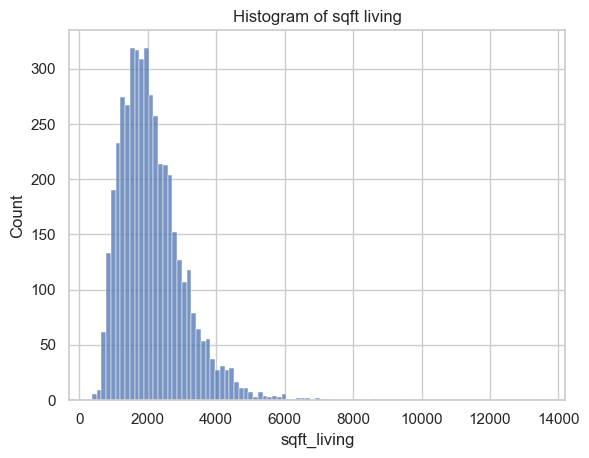

In [59]:
sns.histplot(Price_dataset['sqft_living'])
plt.title('Histogram of sqft living')
plt.show()

/var/folders/3k/3lbygck964ldccpncrf48vsw0000gn/T/ipykernel_26363/65963681.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = Price_dataset.corr()


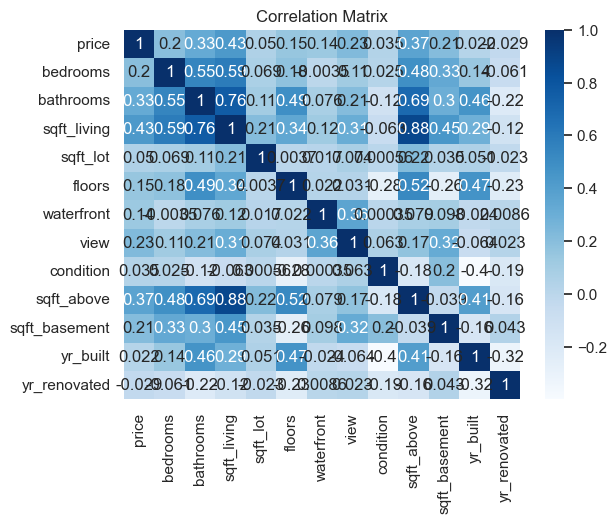

In [60]:
correlation_matrix = Price_dataset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

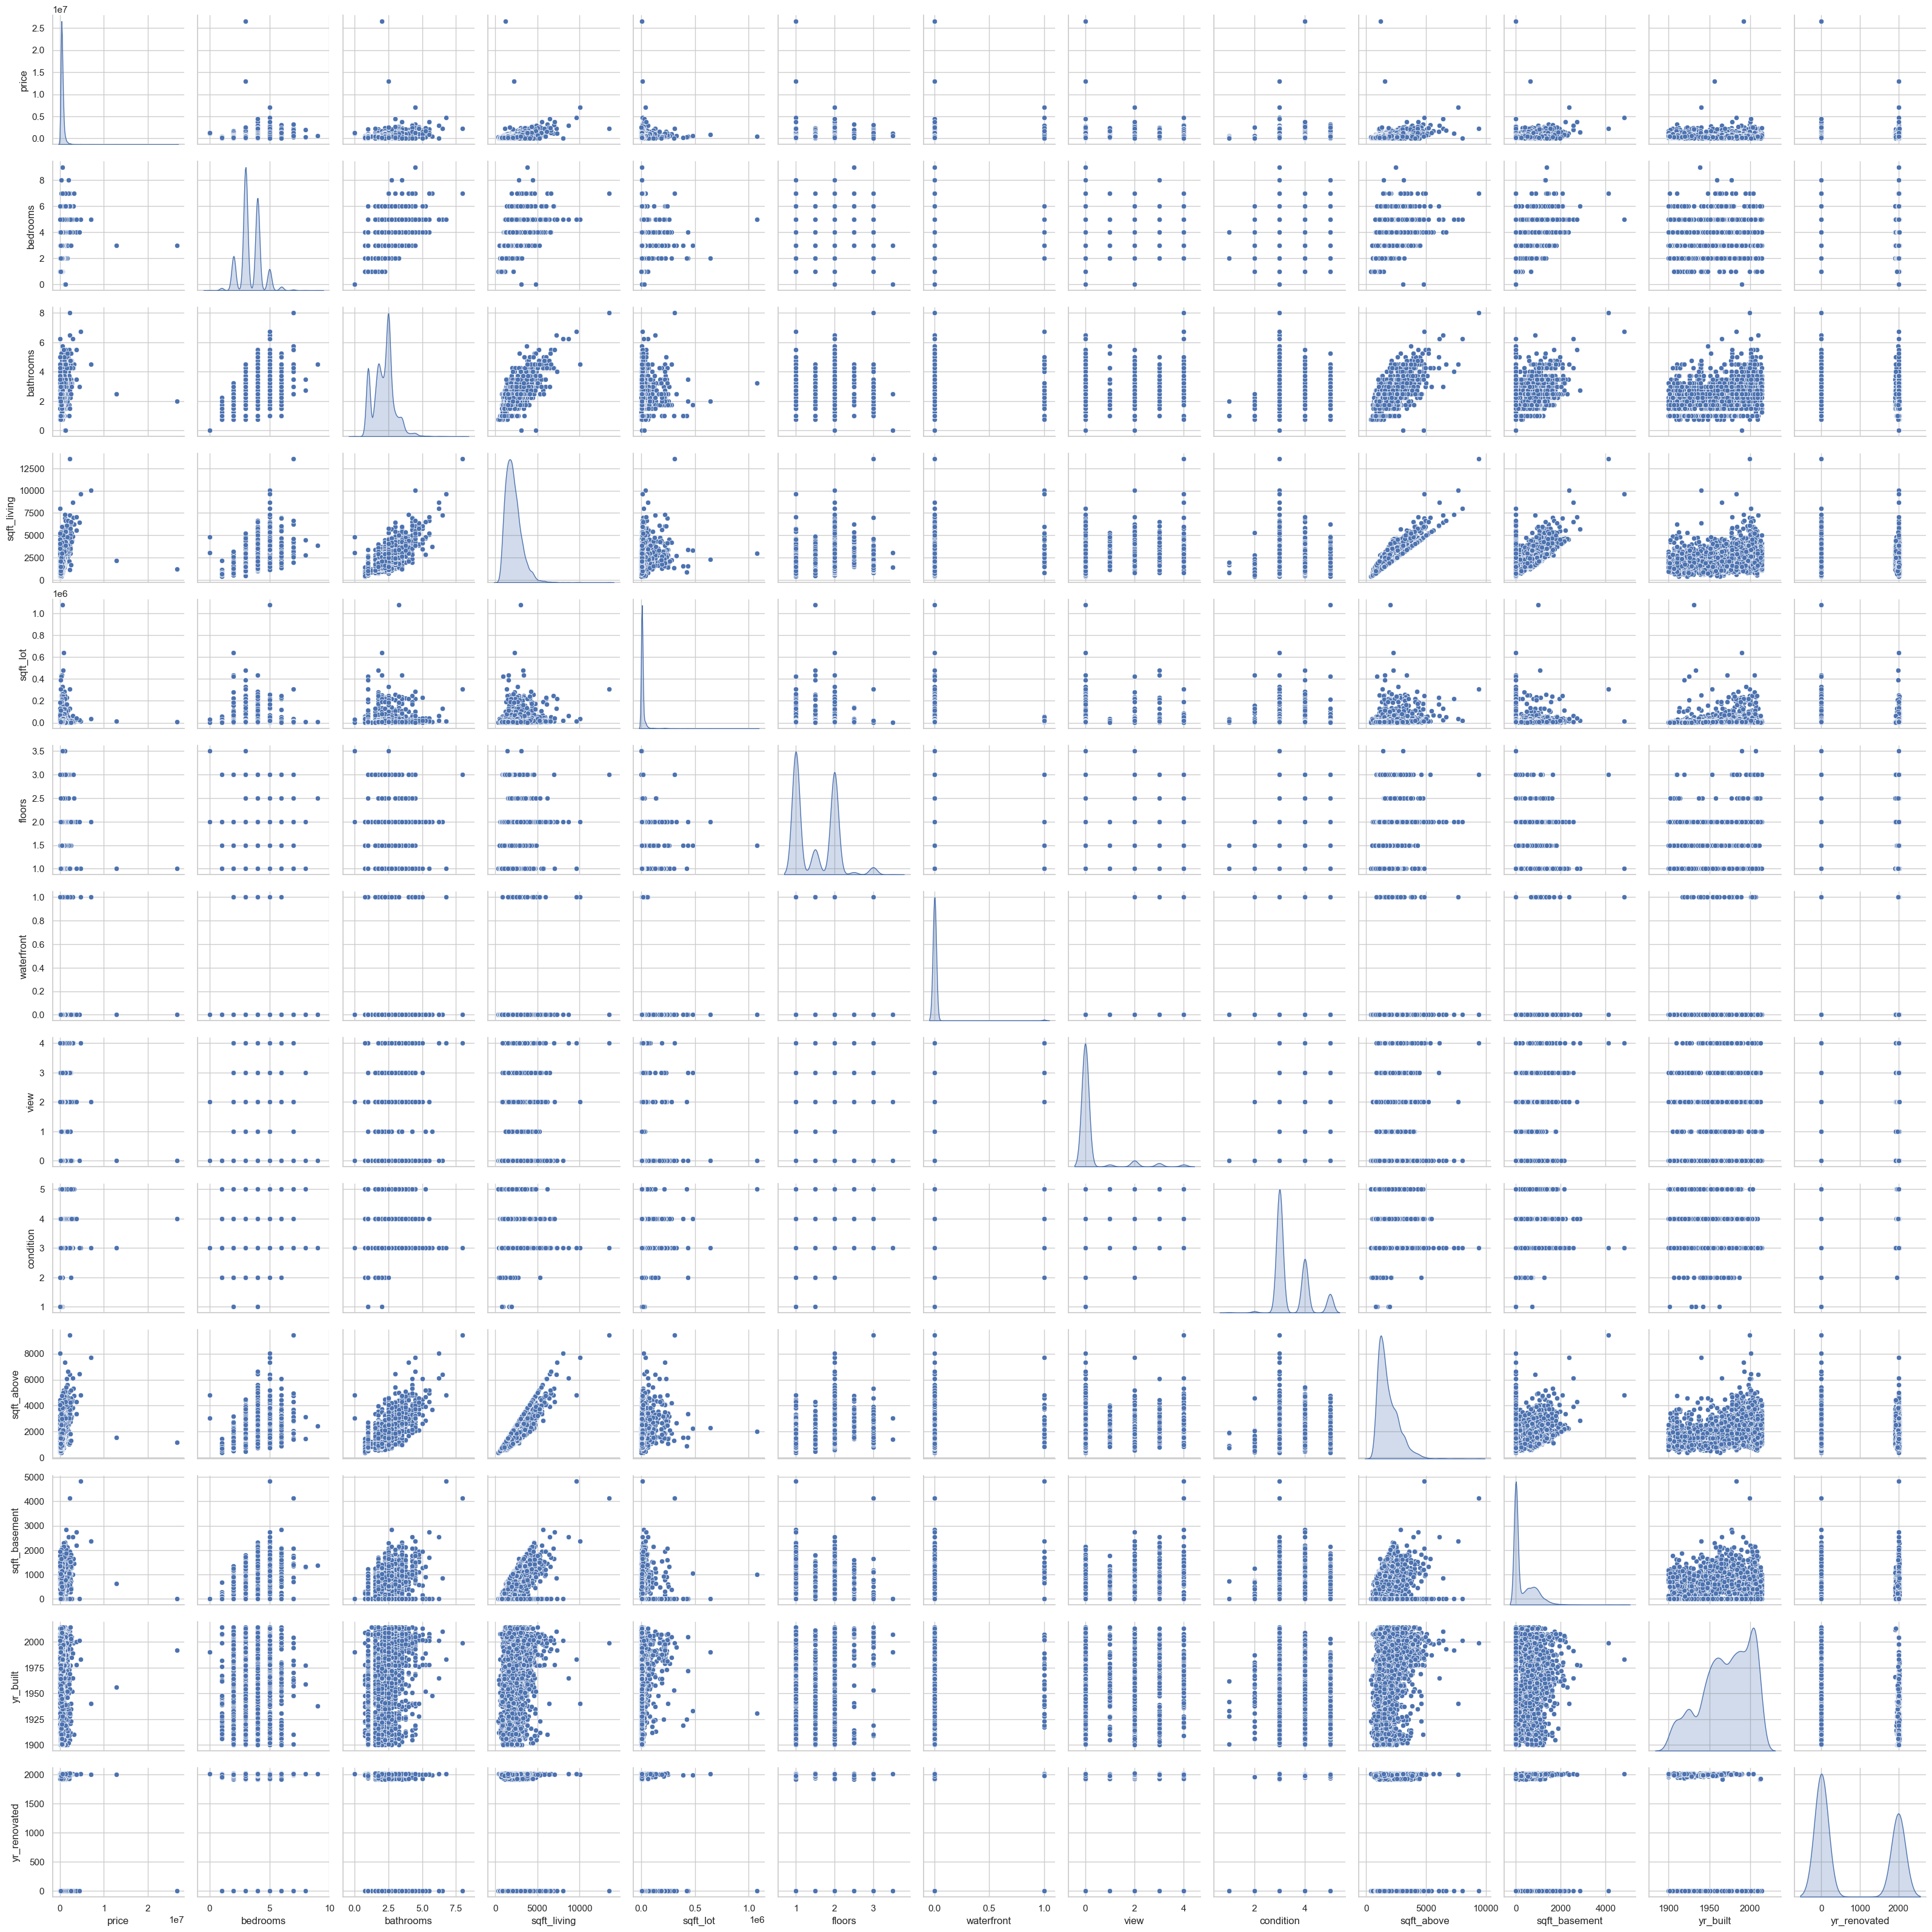

In [62]:
sns.pairplot(Price_dataset, diag_kind='kde')
plt.show()

In [66]:
col_type = Price_dataset.dtypes
nominal_columns = []
categorical_columns = []
continuous_columns = []
categorical_threshold = 10 #As there are 10 values only
for column_name, dtype in col_type.items():
    if dtype == 'object':
        nominal_columns.append(column_name)
    elif dtype == 'int64' or dtype == 'float64':
        unique_values = len(Price_dataset[column_name].unique())
        if unique_values <= categorical_threshold:
            categorical_columns.append(column_name)
        else:
            continuous_columns.append(column_name)

In [67]:
print("Nominal Columns:", nominal_columns)
print("Categorical Columns:", categorical_columns)
print("Continuous Columns:", continuous_columns)

Nominal Columns: ['date', 'street', 'city', 'statezip', 'country']
Categorical Columns: ['bedrooms', 'floors', 'waterfront', 'view', 'condition']
Continuous Columns: ['price', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']


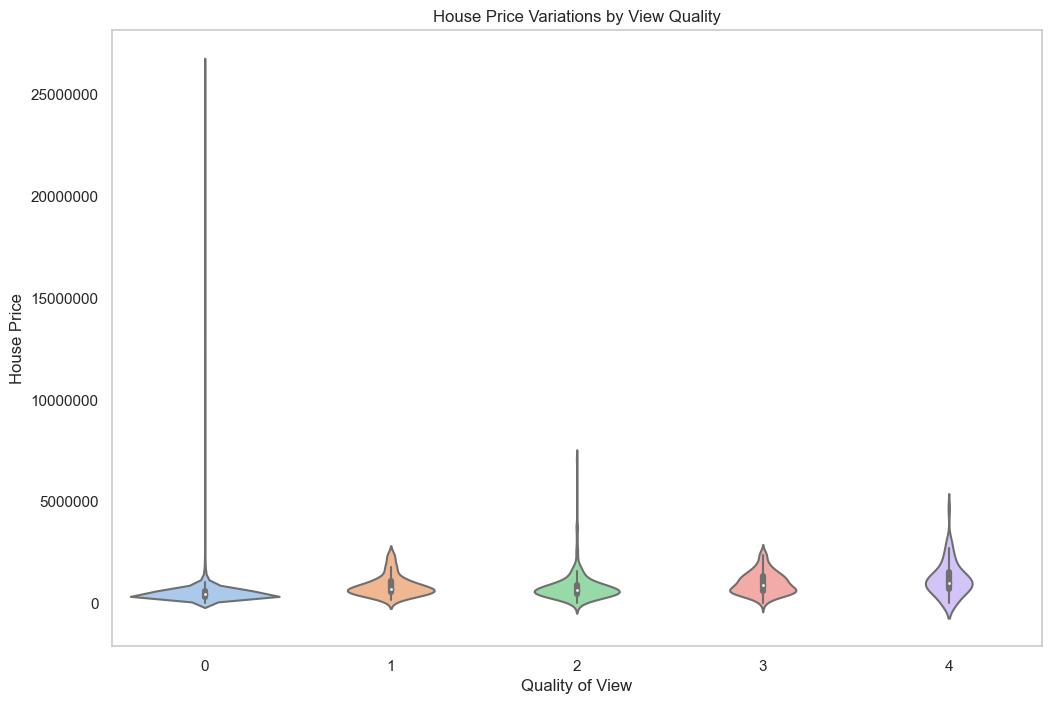

In [70]:
plt.figure(figsize=(12, 8))
sns.violinplot(x=Price_dataset['view'], y=Price_dataset['price'], palette="pastel")
plt.title('House Price Variations by View Quality')
plt.xlabel('Quality of View')
plt.ylabel('House Price')
plt.grid(axis='y')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [71]:
missing_values = Price_dataset.isnull().sum()
missing_values

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [77]:
Numerical_Values = continuous_columns + categorical_columns
summary_statistics = Price_dataset[Numerical_Values].describe()
medians = Price_dataset[Numerical_Values].median()
summary_statistics.loc['median'] = medians
totals = Price_dataset[Numerical_Values].sum()
summary_statistics.loc['total'] = totals
summary_statistics

price    bathrooms   sqft_living      sqft_lot    sqft_above  \
count   4.600000e+03  4600.000000  4.600000e+03  4.600000e+03  4.600000e+03   
mean    5.519630e+05     2.160815  2.139347e+03  1.485252e+04  1.827265e+03   
std     5.638347e+05     0.783781  9.632069e+02  3.588444e+04  8.621690e+02   
min     0.000000e+00     0.000000  3.700000e+02  6.380000e+02  3.700000e+02   
25%     3.228750e+05     1.750000  1.460000e+03  5.000750e+03  1.190000e+03   
50%     4.609435e+05     2.250000  1.980000e+03  7.683000e+03  1.590000e+03   
75%     6.549625e+05     2.500000  2.620000e+03  1.100125e+04  2.300000e+03   
max     2.659000e+07     8.000000  1.354000e+04  1.074218e+06  9.410000e+03   
median  4.609435e+05     2.250000  1.980000e+03  7.683000e+03  1.590000e+03   
total   2.539030e+09  9939.750000  9.840996e+06  6.832157e+07  8.405421e+06   

        sqft_basement      yr_built  yr_renovated      bedrooms       floors  \
count    4.600000e+03  4.600000e+03  4.600000e+03   4600.000000  4600.000000   
mean     3.120815e+02  1.970786e+03  8.086083e+02      3.400870     1.512065   
std      4.641372e+02  2.973185e+01  9.794145e+02      0.908848     0.538288   
min      0.000000e+00  1.900000e+03  0.000000e+00      0.000000     1.000000   
25%      0.000000e+00  1.951000e+03  0.000000e+00      3.000000     1.000000   
50%      0.000000e+00  1.976000e+03  0.000000e+00      3.000000     1.500000   
75%      6.100000e+02  1.997000e+03  1.999000e+03      4.000000     2.000000   
max      4.820000e+03  2.014000e+03  2.014000e+03      9.000000     3.500000   
median   0.000000e+00  1.976000e+03  0.000000e+00      3.000000     1.500000   
total    1.435575e+06  9.065617e+06  3.719598e+06  15644.000000  6955.500000   

         waterfront         view     condition  
count   4600.000000  4600.000000   4600.000000  
mean       0.007174     0.240652      3.451739  
std        0.084404     0.778405      0.677230  
min        0.000000     0.000000      1.000000  
25%        0.000000     0.000000      3.000000  
50%        0.000000     0.000000      3.000000  
75%        0.000000     0.000000      4.000000  
max        1.000000     4.000000      5.000000  
median     0.000000     0.000000      3.000000  
total     33.000000  1107.000000  15878.000000

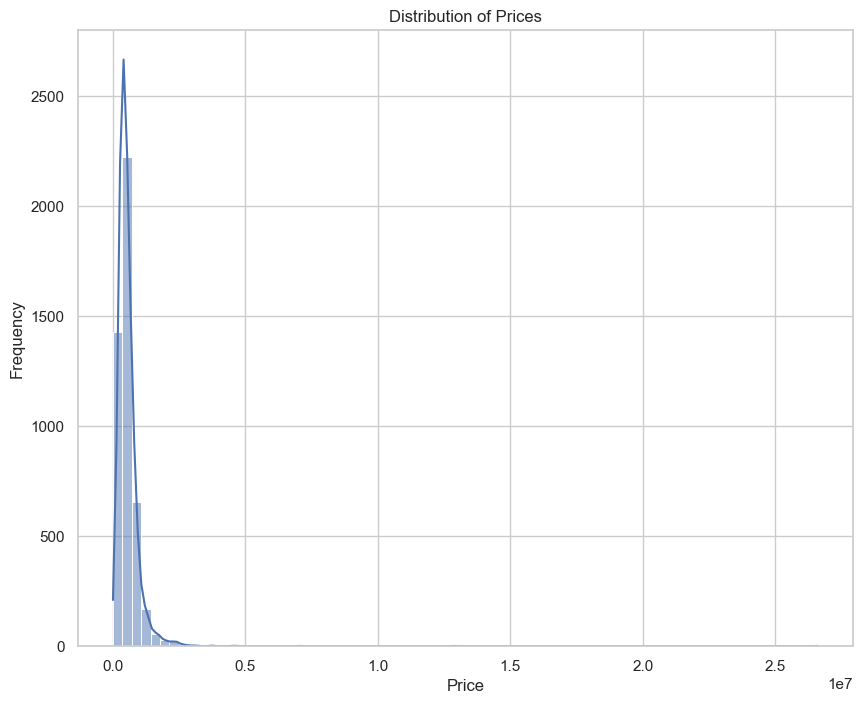

In [79]:
plt.figure(figsize=(10, 8))
sns.histplot(Price_dataset['price'], bins=75, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [80]:
from scipy.stats import shapiro
statistic, p_value = shapiro(Price_dataset['price'])
if p_value > 0.05:
    decision = "The 'price' feature in the dataset follows the Normal distribution."
else:
    decision = "The 'price' feature in the dataset does NOT follows the Normal distribution."
print(decision)

The 'price' feature in the dataset does NOT follows the Normal distribution.


In [86]:
from scipy.stats import ttest_ind
prices_pre_1990 = Price_dataset[Price_dataset['yr_built'] < 1990]['price']
prices_post_1990_inclusive = Price_dataset[Price_dataset['yr_built'] >= 1990]['price']
t_stat, p_value_ttest = ttest_ind(prices_pre_1990, prices_post_1990_inclusive)
if p_value_ttest < 0.05:
    decision_ttest = "H1 Win: There is significant difference in sale prices."
else:
    decision_ttest = "H0 Win: No significant difference in sale prices."
    
print ('The T-stat value is :',t_stat)
print ('The P-value value is :', p_value_ttest)
print ('Conclusion Hypothesis :', decision_ttest)

The T-stat value is : -5.014550457612197
The P-value value is : 5.51579911487353e-07
Conclusion Hypothesis : H1 Win: There is significant difference in sale prices.


In [87]:
from scipy.stats import f_oneway
prices_1990 = Price_dataset[Price_dataset['yr_built'] == 1990]['price']
prices_2000 = Price_dataset[Price_dataset['yr_built'] == 2000]['price']
prices_2010 = Price_dataset[Price_dataset['yr_built'] == 2010]['price']

f_stat, p_value = f_oneway(prices_1990, prices_2000, prices_2010)

if p_value< 0.05:
    decision = "H1 Win: There is a significant difference in sale prices among these groups."
else:
    decision_anova_updated = "H0 Win: No significant difference in sale prices among these groups."

print ('The F-stat value is :',f_stat)
print ('The P-value value is :', p_value)
print ('Conclusion Hypothesis :', decision)

The F-stat value is : 4.286625058295787
The P-value value is : 0.015547293538959776
Conclusion Hypothesis : H1 Win: There is a significant difference in sale prices among these groups.


In [88]:
Covariance_Matrix = Price_dataset[Numerical_Values].cov()
Covariance_Matrix

price      bathrooms   sqft_living      sqft_lot  \
price          3.179096e+11  144557.386308  2.337512e+08  1.020776e+09   
bathrooms      1.445574e+05       0.614313  5.746279e+02  3.032988e+03   
sqft_living    2.337512e+08     574.627928  9.277676e+05  7.277080e+06   
sqft_lot       1.020776e+09    3032.987546  7.277080e+06  1.287693e+09   
sqft_above     1.786832e+08     466.213556  7.278398e+05  6.696771e+06   
sqft_basement  5.506793e+07     108.414371  1.999278e+05  5.803091e+05   
yr_built       3.664046e+05      10.801007  8.241284e+03  5.409914e+04   
yr_renovated  -1.588961e+07    -165.724334 -1.158628e+05 -7.988735e+05   
bedrooms       1.026603e+05       0.388879  5.207667e+02  2.244440e+03   
floors         4.596921e+04       0.205224  1.787990e+02  7.243082e+01   
waterfront     6.455473e+03       0.005043  9.561981e+00  5.221939e+01   
view           1.002886e+05       0.129317  2.331839e+02  2.064409e+03   
condition      1.333196e+04      -0.063693 -4.098216e+01  1.356329e+01   

                 sqft_above  sqft_basement       yr_built  yr_renovated  \
price          1.786832e+08   5.506793e+07  366404.580177 -1.588961e+07   
bathrooms      4.662136e+02   1.084144e+02      10.801007 -1.657243e+02   
sqft_living    7.278398e+05   1.999278e+05    8241.284422 -1.158628e+05   
sqft_lot       6.696771e+06   5.803091e+05   54099.138794 -7.988735e+05   
sqft_above     7.433353e+05  -1.549557e+04   10472.341362 -1.354667e+05   
sqft_basement -1.549557e+04   2.154234e+05   -2231.056939  1.960384e+04   
yr_built       1.047234e+04  -2.231057e+03     883.982809 -9.357424e+03   
yr_renovated  -1.354667e+05   1.960384e+04   -9357.424457  9.592528e+05   
bedrooms       3.798057e+02   1.409610e+02       3.849544 -5.437109e+01   
floors         2.426355e+02  -6.383649e+01       7.481705 -1.233643e+02   
waterfront     5.742388e+00   3.819593e+00      -0.059132  7.129653e-01   
view           1.169935e+02   1.161904e+02      -1.491941  1.750960e+01   
condition     -1.040464e+02   6.306427e+01      -8.048041 -1.239145e+02   

                    bedrooms        floors   waterfront           view  \
price          102660.349539  45969.211306  6455.473229  100288.560225   
bathrooms           0.388879      0.205224     0.005043       0.129317   
sqft_living       520.766735    178.799031     9.561981     233.183935   
sqft_lot         2244.440169     72.430823    52.219389    2064.408500   
sqft_above        379.805727    242.635523     5.742388     116.993512   
sqft_basement     140.961008    -63.836492     3.819593     116.190423   
yr_built            3.849544      7.481705    -0.059132      -1.491941   
yr_renovated      -54.371088   -123.364266     0.712965      17.509601   
bedrooms            0.826005      0.087030    -0.000267       0.078547   
floors              0.087030      0.289754     0.001001       0.013078   
waterfront         -0.000267      0.001001     0.007124       0.023714   
view                0.078547      0.013078     0.023714       0.605914   
condition           0.015437     -0.100255     0.000020       0.033252   

                  condition  
price          13331.964009  
bathrooms         -0.063693  
sqft_living      -40.982165  
sqft_lot          13.563290  
sqft_above      -104.046439  
sqft_basement     63.064274  
yr_built          -8.048041  
yr_renovated    -123.914539  
bedrooms           0.015437  
floors            -0.100255  
waterfront         0.000020  
view               0.033252  
condition          0.458640

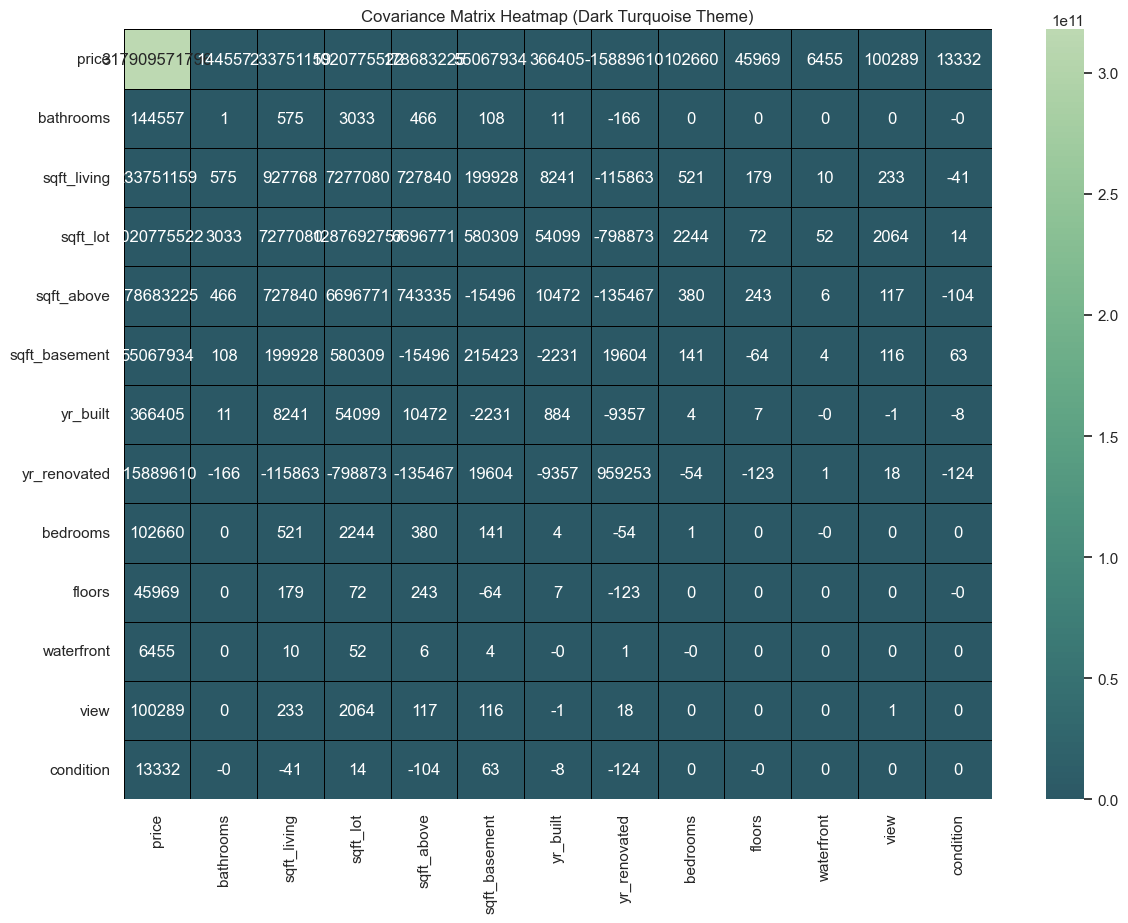

In [89]:
plt.figure(figsize=(14, 10))
cmap_turquoise = sns.cubehelix_palette(as_cmap=True, reverse=True, dark=0.3, light=0.8, rot=-0.5)
sns.heatmap(Covariance_Matrix, annot=True, cmap=cmap_turquoise, fmt=".0f", linewidths=0.5, linecolor='black')
plt.title('Covariance Matrix Heatmap (Dark Turquoise Theme)')
plt.show()

In [90]:
import numpy as np
import numpy.linalg as nla
B = np.array(Covariance_Matrix)
evalue, evector = nla.eig(B)
matrix_rank = np.linalg.matrix_rank(B)
print(evalue)
print(evector)
matrix_rank

[ 3.17913145e+11  1.28446478e+09  1.31108057e+06  8.93134507e+05
  2.96182598e+05  6.50782442e+02  5.84849786e-01  4.71240319e-01
  3.29071200e-01  2.33658678e-01  1.27738312e-01  6.13485190e-03
 -2.75392973e-09]
[[ 9.99994359e-01 -3.23035786e-03 -8.51596811e-04 -3.31278978e-04
  -1.12866961e-04  5.91081399e-06  1.71362133e-07 -5.41664580e-08
  -2.44755588e-08 -7.55431136e-08 -2.40552749e-09  8.71000625e-09
   2.42954291e-15]
 [ 4.54737600e-07  2.00176882e-06  4.61433393e-04  1.09888047e-04
   1.54417958e-04  7.06651255e-03  1.35584996e-01  1.90062175e-01
  -1.26186313e-01  7.66160712e-01  5.85249295e-01  9.67196792e-04
  -5.63485388e-08]
 [ 7.35340568e-04  5.08389398e-03  6.75592283e-01  3.22262450e-01
   3.26122959e-01 -2.38598818e-03 -2.57072633e-04 -4.99429544e-04
   4.01250559e-05 -1.85312049e-04 -1.77439319e-04  5.59241657e-07
   5.77350269e-01]
 [ 3.22393229e-03  9.99970263e-01 -6.62329800e-03 -2.25508726e-03
   3.53655964e-04  2.89003475e-05  1.54336255e-06  7.00474563e-07
  -9

12

Q15. Interpret the Eigenvectors in the context of the dataset. What do they represent and their significance?

A) What does eigenvectors represent:

Eigenvectors show data’s main directions. Principal components are linear combinations of original attributes that describe data variability.

Importance of eigen vectors in the data:

i) Eigenvector direction describes feature combination. Eigenvectors with large positive and negative values for some features imply a strong negative association. 

ii) All fundamental components' eigenvalues represent their variance. High eigenvalues mean the dominant component absorbs more variance.

iii) PCA reduces dimensionality using eigenvectors. Top eigenvectors (highest eigenvalues) capture greatest data variation while minimizing features. It helps in reducing the noise, pre processing of the data before training a machine learning model. 

iv) Our dataset's eigenvectors help us find housing data's most frequently changing feature combinations. This may identify the most important property price and feature relationships.

In [91]:
import numpy.linalg as la
B = np.array(Covariance_Matrix)
B_inv = la.inv(B)
B_inv

array([[ 4.02141066e-12, -2.30022634e-07, -1.25649778e-09,
         2.77979084e-12,  3.05415962e-10,  5.54937259e-11,
         9.56375963e-09, -2.64315884e-11,  2.33410076e-07,
        -1.60085132e-07, -1.42898246e-06, -1.83773134e-07,
        -1.28056491e-07],
       [-2.30022634e-07,  5.35024413e+00, -7.78565051e-04,
         2.24562713e-06, -1.55713010e-03, -2.33569515e-03,
        -3.24484850e-02,  1.05411176e-04, -6.99779967e-01,
        -1.72051984e+00, -1.48096924e-01, -7.26987962e-02,
        -1.67390565e-01],
       [-1.27194085e-09, -8.83571244e-04, -1.78568248e+09,
         4.68248755e-09,  1.78568248e+09,  1.78568248e+09,
        -1.82962795e-06,  1.97197094e-07, -9.33899792e-04,
         5.37641707e-04, -2.74775964e-03, -2.57818309e-04,
         1.39011521e-04],
       [ 2.77979084e-12,  2.24562713e-06, -2.80170963e-09,
         8.36481320e-10, -1.00061058e-08, -1.20073270e-09,
        -1.41732683e-08,  2.22563984e-10,  2.40928235e-06,
         7.33468811e-06,  5.28210596e

In [92]:

X_Matrix = Price_dataset[['bedrooms', 'sqft_lot', 'floors', 'yr_built']].values
Y_Matrix = Price_dataset['price'].values
print(X_Matrix)
print(Y_Matrix)

[[3.0000e+00 7.9120e+03 1.5000e+00 1.9550e+03]
 [5.0000e+00 9.0500e+03 2.0000e+00 1.9210e+03]
 [3.0000e+00 1.1947e+04 1.0000e+00 1.9660e+03]
 ...
 [3.0000e+00 7.0140e+03 2.0000e+00 2.0090e+03]
 [4.0000e+00 6.6300e+03 1.0000e+00 1.9740e+03]
 [3.0000e+00 8.1020e+03 2.0000e+00 1.9900e+03]]
[ 313000.       2384000.        342000.       ...  416904.166667
  203400.        220600.      ]


In [93]:
Transpose_X_Matrix = X_Matrix.T
print(X_Matrix.T)

[[3.0000e+00 5.0000e+00 3.0000e+00 ... 3.0000e+00 4.0000e+00 3.0000e+00]
 [7.9120e+03 9.0500e+03 1.1947e+04 ... 7.0140e+03 6.6300e+03 8.1020e+03]
 [1.5000e+00 2.0000e+00 1.0000e+00 ... 2.0000e+00 1.0000e+00 2.0000e+00]
 [1.9550e+03 1.9210e+03 1.9660e+03 ... 2.0090e+03 1.9740e+03 1.9900e+03]]


In [94]:
a_coefficient = la.solve(X_Matrix.T @ X_Matrix, X_Matrix.T @ Y_Matrix)
a_coefficient

array([ 1.11398600e+05,  5.98070191e-01,  1.28189372e+05, -1.52885306e+01])

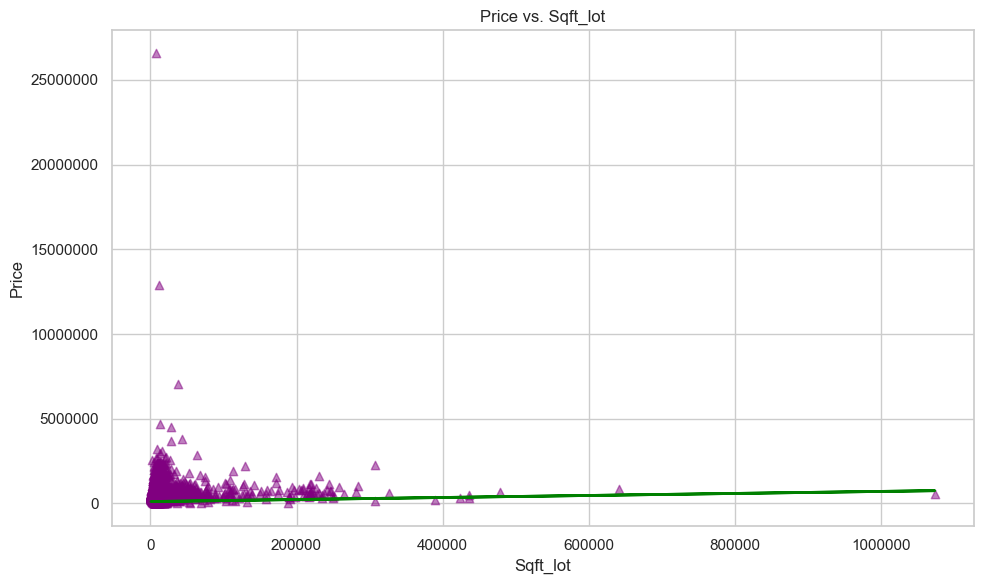

In [95]:
sqft_lot = X_Matrix[:, 1]
plt.figure(figsize=(10, 6))
plt.scatter(sqft_lot, Y_Matrix, alpha=0.5, color='purple', marker='^')
plt.plot(sqft_lot, a_coefficient[1] * sqft_lot + a_coefficient[0], color='green', linewidth=2)
plt.title('Price vs. Sqft_lot')
plt.xlabel('Sqft_lot')
plt.ylabel('Price')
plt.ticklabel_format(style='plain', axis='both')
plt.grid(True)
plt.tight_layout() 
plt.show()